In [1]:
from agent_lstmdqn import LSTMDQNAgent
from env_fx import FXEnv

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [3]:
env = FXEnv(
    '/mnt/Omer/Project/10.AdaptivePacing/dst/npy/USDJPY.npy',
    spread=0.,
    min_act_interval=4,
    load_interval=60
)

In [4]:
agent = LSTMDQNAgent(env.enable_actions, env.name)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
env.reset()

In [6]:
agent.init_model()

In [7]:
agent.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 300)               362400    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1204      
_________________________________________________________________
activation_2 (Activation)    (None, 4)                 0         
Total params: 363,604
Trainable params: 363,604
Non-trainable params: 0
_________________________________________________________________


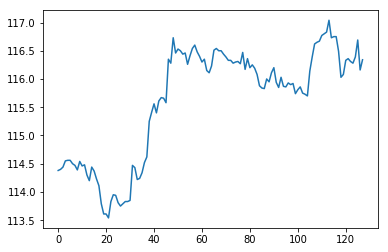

In [8]:
env.update(0)
plt.plot(env.screen)

In [9]:
for i in range(32):
    state_1 = env.screen[np.newaxis, :, np.newaxis]
    if i != 0:
        action = agent.select_action(state, epsilon=0.2)
        env.update(action)
        agent.store_experience(state, action, env.reward, state_1, env.terminal)
    state = copy.copy(state_1)    

print(env.time_step, flush=True)

agent.experience_replay()

160
Instructions for updating:
Use tf.cast instead.
Train on 27 samples, validate on 4 samples
Epoch 1/10
27/27 [==============================] - 1s 34ms/step - loss: 0.0242 - val_loss: 0.1114

Epoch 00001: val_loss improved from inf to 0.11143, saving model to /mnt/Omer/Project/10.AdaptivePacing/dst/dqn_agent/models/cp_.01-0.11.hdf5
Epoch 2/10
27/27 [==============================] - 0s 9ms/step - loss: 0.1058 - val_loss: 0.0458

Epoch 00002: val_loss improved from 0.11143 to 0.04584, saving model to /mnt/Omer/Project/10.AdaptivePacing/dst/dqn_agent/models/cp_.02-0.05.hdf5
Epoch 3/10
27/27 [==============================] - 0s 10ms/step - loss: 0.0506 - val_loss: 0.0063

Epoch 00003: val_loss improved from 0.04584 to 0.00632, saving model to /mnt/Omer/Project/10.AdaptivePacing/dst/dqn_agent/models/cp_.03-0.01.hdf5
Epoch 4/10
27/27 [==============================] - 0s 11ms/step - loss: 0.0238 - val_loss: 0.0041

Epoch 00004: val_loss improved from 0.00632 to 0.00411, saving model to 

In [10]:
print(np.sum( [x[2] for x in agent.D] ) )
env.log

-0.25


[(116.16, 116.61, 'long', 0.45000000000000284, 140),
 (116.61, 117.31, 'short', -0.7000000000000028, 152)]

In [11]:
agent.history.history['loss']

[0.024240052327513695,
 0.10578526556491852,
 0.050596289336681366,
 0.023820245638489723,
 0.03206557035446167,
 0.046226292848587036,
 0.04934278130531311,
 0.04277103394269943,
 0.032738860696554184,
 0.02500329352915287]

In [ ]:
terminal = False
state_t_1, reward_t, terminal = env.observe()

while not terminal:

    print(env.time_step)
    state_t = state_t_1

    # execute action in environment
    action_t = agent.select_action(state_t, agent.exploration)
    env.update(action_t)

    # observe environment
    state_t_1, reward_t, terminal = env.observe()

    # store experience
    agent.store_experience(state_t, action_t, reward_t, state_t_1, terminal)

    # experience replay
    agent.experience_replay()


In [15]:
D = agent.D

In [25]:
agent.model.load_weights?

Signature:
agent.model.load_weights(
    filepath,
    by_name=False,
    skip_mismatch=False,
    reshape=False,
)
Docstring:
Loads all layer weights from a HDF5 save file.

If `by_name` is False (default) weights are loaded
based on the network's topology, meaning the architecture
should be the same as when the weights were saved.
Note that layers that don't have weights are not taken
into account in the topological ordering, so adding or
removing layers is fine as long as they don't have weights.

If `by_name` is True, weights are loaded into layers
only if they share the same name. This is useful
for fine-tuning or transfer-learning models where
some of the layers have changed.

# Arguments
    filepath: String, path to the weights file to load.
    by_name: Boolean, whether to load weights by name
        or by topological order.
    skip_mismatch: Boolean, whether to skip loading of layers
        where there is a mismatch in the number of weights,
        or a mismatch in the sh

In [24]:
D[1][1]

1